## Importación de Librerias

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Definición de Ruta dataset

In [5]:
% mkdir "01. Dataset"

In [18]:
% mkdir 'results'

In [11]:
% ls -lhtr '01. Dataset'

total 16M
-rw-r--r-- 1 root root 3.0K Jun 26 20:37 labels_bankruptcy.csv
-rw-r--r-- 1 root root  12M Jun 26 20:37 dataset_normalizado.csv
-rw-r--r-- 1 root root 4.0M Jun 26 20:39 dataset.csv


In [7]:
orig_dir = os.getcwd()
os.chdir("..")
os.chdir('01. Dataset')
dsets_files = glob.glob('*.csv')
for fil in dsets_files:
    if fil == 'labels_bankruptcy.csv': 
        f_labels = os.path.abspath(fil)
    if fil == 'dataset_normalizado.csv':
        f_data = os.path.abspath(fil)
os.chdir(orig_dir)

In [12]:
% ls -lhtr '01. Dataset'

total 17M
-rw-r--r-- 1 root root 3.0K Jun 26 20:37 labels_bankruptcy.csv
-rw-r--r-- 1 root root  12M Jun 26 20:37 dataset_normalizado.csv
-rw-r--r-- 1 root root 5.1M Jun 26 20:39 dataset.csv


## Dataset y etiquetas, lectura y comprensión

In [13]:
df_col = pd.read_csv(f_labels, sep=' ',names=['codes','Names'])
names_to_codes = dict(zip(df_col['Names'],df_col['codes'])) 
codes_to_names = dict(zip(df_col['codes'],df_col['Names']))
cols = ['flag']
cols = cols + list(df_col['Names'])
df = pd.read_csv(f_data, encoding = "cp1252", names=cols, skiprows=1)
df.head(5)

,flag,Cost_of_Interest-bearing_Debt,Cash_Reinvestment_Ratio,Current_Ratio,Acid_Test,Interest_Expenses/Total_Revenue,Total_Liability/Equity_Ratio,Liability/Total_Assets,Interest-bearing_Debt/Equity,Contingent_Liability/Equity,Operating_Income/Capital,Pretax_Income/Capital,Working_Capital_to_Total_Assets,Quick_Assets/Total_assets,Current_Assets/Total_Assets,Cash/Total_Assets,Quick_Assets/Current_Liability,Cash/Current_Liability,Current_Liability_to_Assets,Operating_Funds_to_Liability,Inventory/Working_Capital,Inventory/Current_Liability,Current_Liabilities/Liability,Working_Capital/Equity,Current_Liabilities/Equity,Long-term_Liability_to_Current_Assets,Current_Liability_to_Current_Assets,One_if_Total_Liability_exceeds_Total_Assets;,Equity_to_Liability,Equity/Total_Assets,(Long-term_Liability+Equity)/Fixed_Assets,Fixed_Assets_to_Assets,Current_Liability_to_Liability,Current_Liability_to_Equity,Equity_to_Long-term_Liability,Liability_to_Equity,Degree_of_Financial_Leverage,Interest_Coverage_Ratio,Operating_Expenses/Net_Sales,(Research_and_Development_Expenses)/Net_Sales,...,Operating_Income_/Net_Sales,Pre-Tax_Income/Net_Sales,Net_Income/Net_Sales,Net_Non-operating_Income_Ratio,Net_Income-Exclude_Disposal_Gain_or_Loss/Net_Sales,EPS-Net_Income,Pretax_Income_Per_Share,Retained_Earnings_to_Total_Assets,Total_Income_to_Total_Expenses,Total_Expenses_to_Assets,Net_Income_to_Total_Assets,Gross_Profit_to_Sales,Net_Income_to_Stockholder's_Equity,One_if_Net_Income_is_Negative_for_the_Last_Two_Years;_Zero_Otherwise,(Inventory_+Accounts_Receivables)_/Equity,Total_Asset_Turnover,Accounts_Receivable_Turnover,Days_Receivable_Outstanding,Inventory_Turnover,Fixed_Asset_Turnover,Equity_Turnover,Current_Assets_to_Sales,Quick_Assets_to_Sales,Working_Capital_to_Sales,Cash_to_Sales,Cash_Flow_to_Sales,No-credit_Interval,Cash_Flow_from_Operating/Current_Liabilities,Cash_Flow_to_Total_Assets,Cash_Flow_to_Liability,CFO_to_Assets,Cash_Flow_to_Equity,Realized_Gross_Profit_Growth_Rate,Operating_Income_Growth,Net_Income_Growth,Continuing_Operating_Income_after_Tax_Growth,Net_Income-Excluding_Disposal_Gain_or_Loss_Growth,Total_Asset_Growth,Total_Equity_Growth,Return_on_Total_Asset_Growth
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,0.000126,0.000000,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,0.000050,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,0.000147,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,0.000070,0.000066,0.593831,0.000005,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,0.000290,0.000000,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,0.000061,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,0.001384,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,0.000107,0.000077,0.593916,0.000025,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,0.000236,0.000003,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,0.000073,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,...,0.602806,0.000991,0.006302,0.000053,0.098162,0.336731,0.

In [14]:
df.shape

(6819, 96)

## Estadísticas y Gráficos

In [15]:
def save_figure(fig,path,name):
  fname = os.path.join('results',path,name)
  with PdfPages(fname) as pdf:
    pdf.savefig(fig)

**Seaborn plots, distribuciones (resultados en carpeta /results)**

In [19]:
width = 14
height = 14

plt.style.use("default")


figures = np.array([None]*6)
axes = np.array([None]*6)
for i in range(6):
  figures[i], axes[i] = plt.subplots(nrows=4, ncols=4, figsize=(width, height))

k = 0
columns = df.columns
for i in range(6):
  for axe in axes[i].flatten():
    sns.distplot(df[columns[k]], ax=axe)
    k = k + 1
  plt.tight_layout()
  save_figure(figures[i],'.','distri_{}_{}.pdf'.format(i*16,(i+1)*16))
  figures[i].clf()

<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

In [21]:
% ls -lhtr 'results'

total 272K
-rw-r--r-- 1 root root 43K Jun 26 20:53 distri_0_16.pdf
-rw-r--r-- 1 root root 43K Jun 26 20:53 distri_16_32.pdf
-rw-r--r-- 1 root root 45K Jun 26 20:53 distri_32_48.pdf
-rw-r--r-- 1 root root 46K Jun 26 20:54 distri_48_64.pdf
-rw-r--r-- 1 root root 44K Jun 26 20:54 distri_64_80.pdf
-rw-r--r-- 1 root root 44K Jun 26 20:54 distri_80_96.pdf


**Correlación de variables**

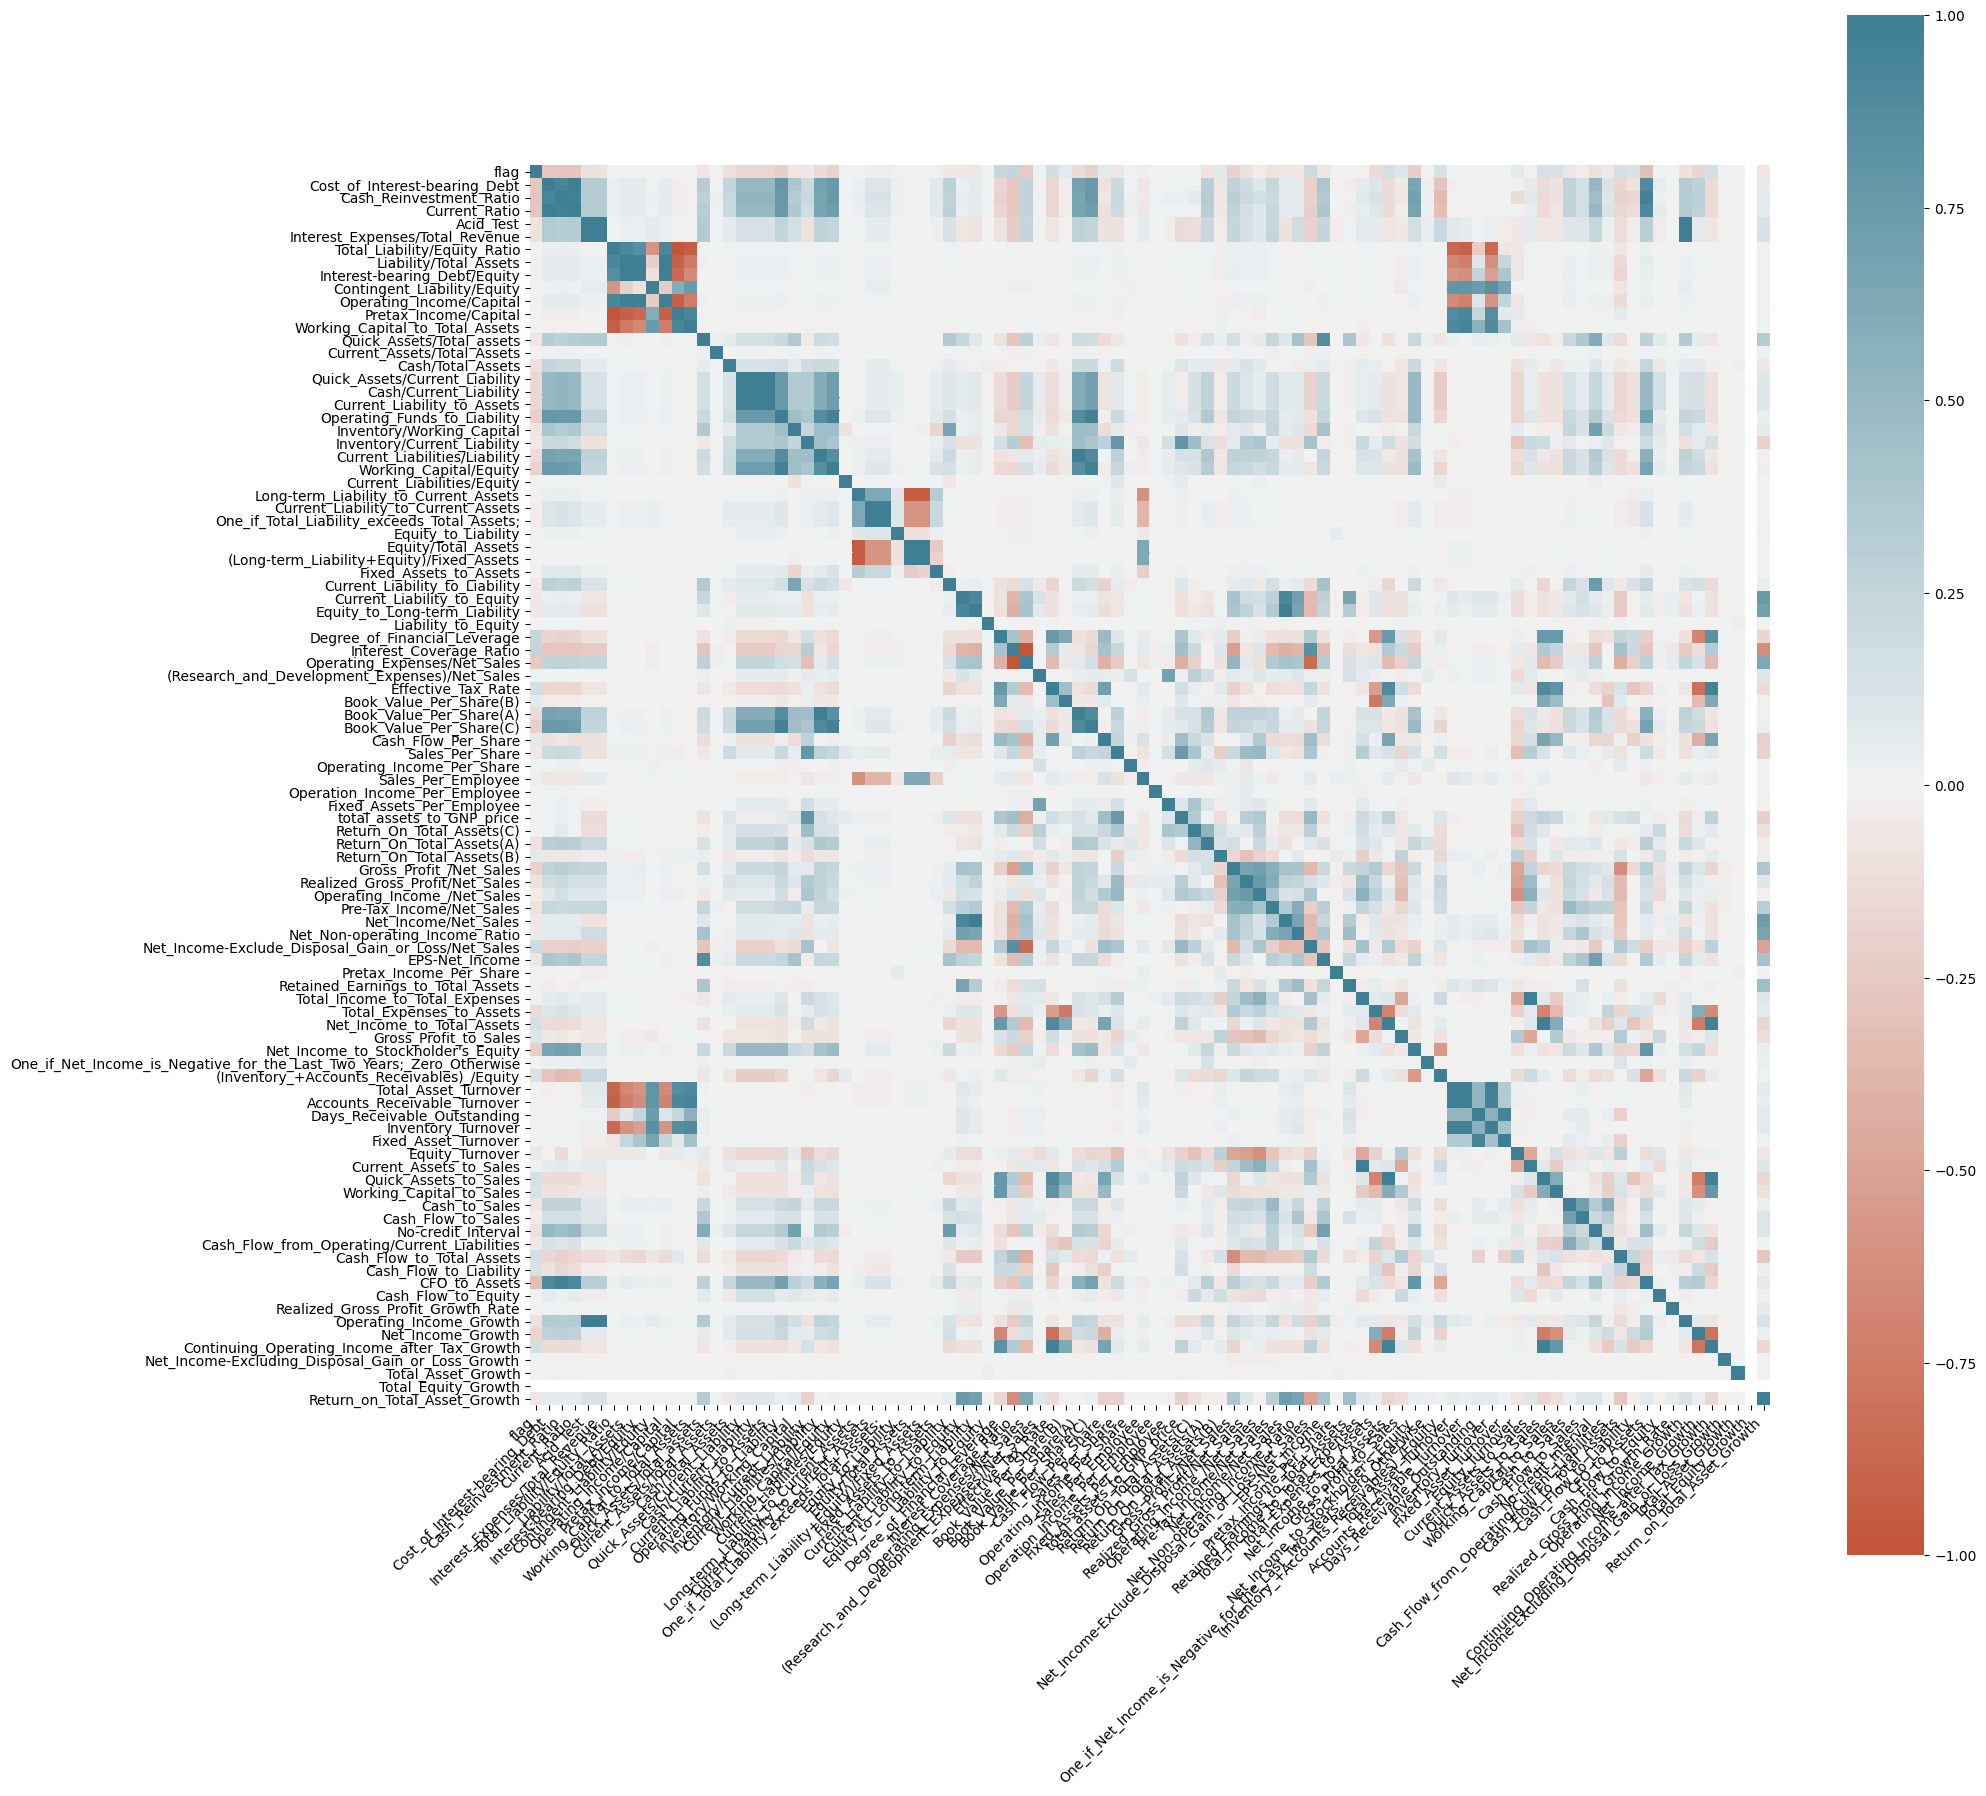

In [22]:
# Se observa en la gráfica de correlaciones, que Total_Equity_Growth no es relevante
corr = df.corr()
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    yticklabels=list(df.columns),
    xticklabels=list(df.columns),
    square=True,
    ax = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
save_figure(fig,'.','correlations.pdf')

**Características del dataframe**


In [23]:
# Notar que Total_Equity_Growth es siempre 1
# Además de evidencia que no se tiene variables categóricas
df.describe() 

,flag,Cost_of_Interest-bearing_Debt,Cash_Reinvestment_Ratio,Current_Ratio,Acid_Test,Interest_Expenses/Total_Revenue,Total_Liability/Equity_Ratio,Liability/Total_Assets,Interest-bearing_Debt/Equity,Contingent_Liability/Equity,Operating_Income/Capital,Pretax_Income/Capital,Working_Capital_to_Total_Assets,Quick_Assets/Total_assets,Current_Assets/Total_Assets,Cash/Total_Assets,Quick_Assets/Current_Liability,Cash/Current_Liability,Current_Liability_to_Assets,Operating_Funds_to_Liability,Inventory/Working_Capital,Inventory/Current_Liability,Current_Liabilities/Liability,Working_Capital/Equity,Current_Liabilities/Equity,Long-term_Liability_to_Current_Assets,Current_Liability_to_Current_Assets,One_if_Total_Liability_exceeds_Total_Assets;,Equity_to_Liability,Equity/Total_Assets,(Long-term_Liability+Equity)/Fixed_Assets,Fixed_Assets_to_Assets,Current_Liability_to_Liability,Current_Liability_to_Equity,Equity_to_Long-term_Liability,Liability_to_Equity,Degree_of_Financial_Leverage,Interest_Coverage_Ratio,Operating_Expenses/Net_Sales,(Research_and_Development_Expenses)/Net_Sales,...,Operating_Income_/Net_Sales,Pre-Tax_Income/Net_Sales,Net_Income/Net_Sales,Net_Non-operating_Income_Ratio,Net_Income-Exclude_Disposal_Gain_or_Loss/Net_Sales,EPS-Net_Income,Pretax_Income_Per_Share,Retained_Earnings_to_Total_Assets,Total_Income_to_Total_Expenses,Total_Expenses_to_Assets,Net_Income_to_Total_Assets,Gross_Profit_to_Sales,Net_Income_to_Stockholder's_Equity,One_if_Net_Income_is_Negative_for_the_Last_Two_Years;_Zero_Otherwise,(Inventory_+Accounts_Receivables)_/Equity,Total_Asset_Turnover,Accounts_Receivable_Turnover,Days_Receivable_Outstanding,Inventory_Turnover,Fixed_Asset_Turnover,Equity_Turnover,Current_Assets_to_Sales,Quick_Assets_to_Sales,Working_Capital_to_Sales,Cash_to_Sales,Cash_Flow_to_Sales,No-credit_Interval,Cash_Flow_from_Operating/Current_Liabilities,Cash_Flow_to_Total_Assets,Cash_Flow_to_Liability,CFO_to_Assets,Cash_Flow_to_Equity,Realized_Gross_Profit_Growth_Rate,Operating_Income_Growth,Net_Income_Growth,Continuing_Operating_Income_after_Tax_Growth,Net_Income-Excluding_Disposal_Gain_or_Loss_Growth,Total_Asset_Growth,Total_Equity_Growth,Return_on_Total_Asset_Growth
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,0.000444,0.000244,0.467431,0.000826,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,0.038964,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,0.000239,0.000688,0.264248,0.379677,0.015104,0.011062,0.630991,0.007997,0.113177,0.886823,0.008783,...,0.522273,0.124095,0.011759,0.013096,0.090673,0.353828,0.277395,0.008989,0.761599,0.735817,0.331410,0.007137,0.934733,0.002549,0.029184,0.000546,0.000427,0.594006,0.000438,0.671531,0.249353,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,0.008639,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,0.012679,0.013021,0.012119,

**Class count**

In [ ]:
df['flag'].value_counts() # cuentas por categía, muestra que está desbalanceado

0    6599
1     220
Name: flag, dtype: int64